In [89]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
filename = "/Users/matthewpotts/Google Drive/UCBerkeley/w210/Project Files/Pills/p129/1222.jpg"


In [90]:
W = 500.
oriimg = cv2.imread(filename)
height, width, depth = oriimg.shape
imgScale = W/width
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
image = cv2.resize(oriimg,(int(newX),int(newY)))

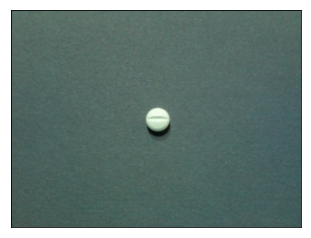

In [91]:
#cv2.imshow("im", image)
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

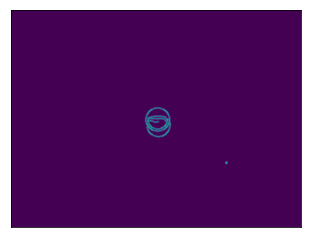

In [92]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(image, 100, 250)
plt.imshow(edged, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [93]:
(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
idx = 0
for c in cnts:
	x,y,w,h = cv2.boundingRect(c)
	if w>10 and h>10:
		idx+=1
		new_img = image[y:y+h,x:x+w]
		cv2.imwrite('/Users/matthewpotts/Pills-with-Siamese-Networks/test_crop/' + filename[-8:-4] + '.jpg', new_img)


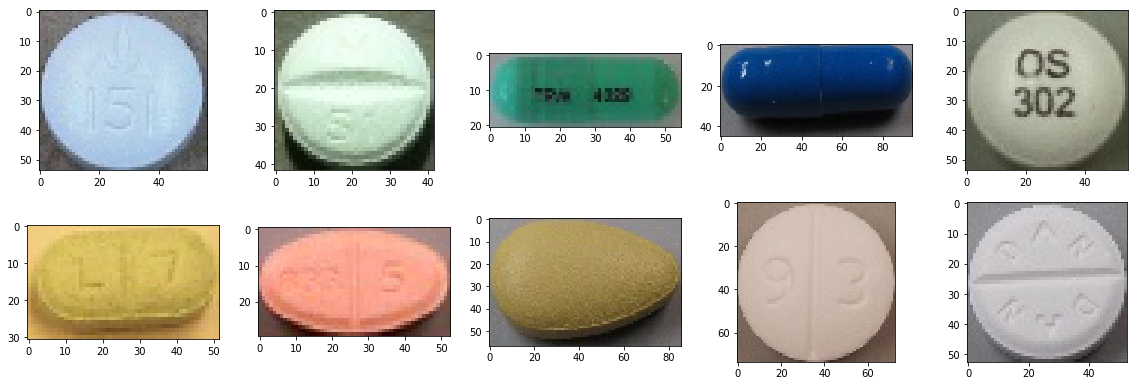

In [94]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/Users/matthewpotts/Pills-with-Siamese-Networks/test_crop/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)